In [2]:
from matplotlib import pyplot as plt
import os
from PIL import Image
from utils import *

plt.style.use('ggplot')

### Computing feature values for original and 3x3 median filtered images for various d and tau values and saving it in text files

In [3]:
tau_values = list(range(90, 110, 2))
d_values = list(range(4,10))

for tau in tau_values:
    for d in d_values:
        print(f'tau = {tau} and d value = {d}')
        ucid_images = os.listdir(dataset_path)
        np.random.shuffle(ucid_images)

        # Extracting the feature value from original images
        original_filename = f'./Data/d_and_tau3x3/original/d-{d}-tau-{tau}.txt' 
        if os.path.exists(original_filename):
            break
        with open(original_filename, 'w') as out:
            for img in ucid_images:
                img_path = os.path.join(dataset_path, img)
                I = cv2.imread(img_path, 0)
                out.write(str(caoICME10(I, d, tau)) + '\n')

        # Extracting the feature value from median filtered images
        median3x3_filename = f'./Data/d_and_tau3x3/median3x3/d-{d}-tau-{tau}.txt' 
        if os.path.exists(median3x3_filename):
            break
        with open(median3x3_filename, 'w') as out:
            for img in ucid_images:
                img_path = os.path.join(dataset_path, img)
                I = cv2.imread(img_path, 0)
                # Applying 3x3 median filter
                blurred_I = cv2.medianBlur(I, 3)
                out.write(str(caoICME10(blurred_I, d, tau)) + '\n')

tau = 90 and d value = 4
tau = 92 and d value = 4
tau = 94 and d value = 4
tau = 96 and d value = 4
tau = 98 and d value = 4
tau = 100 and d value = 4
tau = 102 and d value = 4
tau = 104 and d value = 4
tau = 106 and d value = 4
tau = 108 and d value = 4


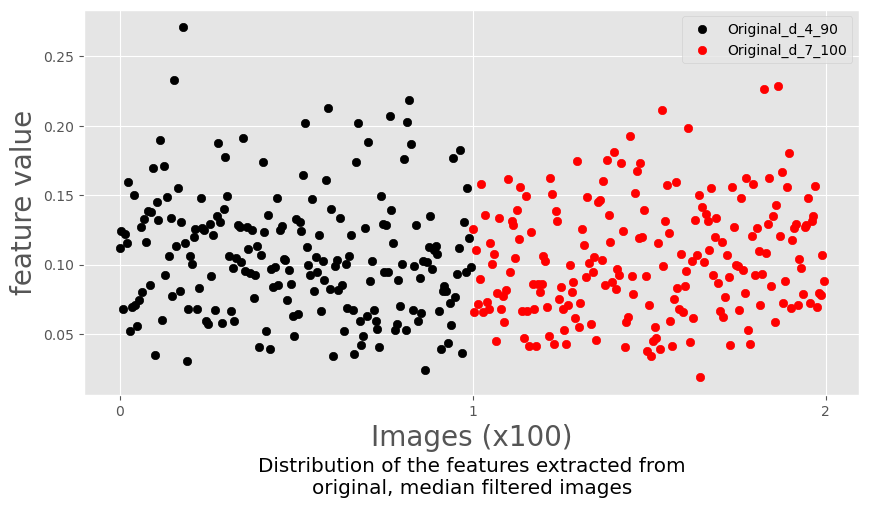

In [11]:
# Loading features
original_d_4_90_feature_values = []
with open('./Data/d_and_tau3x3_hyperparameter_tuning/original/d-7-tau-90.txt', 'r') as out:
    f = out.readline().strip()
    while f:
        original_d_4_90_feature_values.append(float(f))
        f = out.readline().strip()

original_d_7_100_feature_values = []
with open('./Data/d_and_tau3x3_hyperparameter_tuning/original/d-7-tau-100.txt', 'r') as out:
    f = out.readline().strip()
    while f:
        original_d_7_100_feature_values.append(float(f))
        f = out.readline().strip()


median3x3_d_7_100_feature_values = []
with open('./Data/d_and_tau3x3_hyperparameter_tuning/median3x3/d-7-tau-100.txt', 'r') as out:
    f = out.readline().strip()
    while f:
        median3x3_d_7_100_feature_values.append(float(f))
        f = out.readline().strip()


# Plotting features
plt.rcParams['figure.figsize'] = [10, 5]  # this changes default fig size

plt.scatter(np.arange(0, 1, 1/200), original_d_4_90_feature_values, label= 'Original_d_4_90', color='k')
plt.scatter(np.arange(1, 2, 1/200), original_d_7_100_feature_values, label= 'Original_d_7_100', color='r')

plt.xticks(np.arange(0, 3, 1.0))
plt.xlabel("Images (x100)", fontsize=20)
plt.ylabel("feature value", fontsize=20).set_rotation(90)
plt.title('Distribution of the features extracted from\noriginal, median filtered images', y=-0.28)
plt.legend()
# plt.savefig('FIG-1')
plt.show()

In [12]:
# Computing True positive and False positive rate for an example when d = 5, tau = 95
median3x3_d_5_95_true_positive_rates = []
median3x3_d_5_95_false_positive_rates = []

thresholds = np.arange(0.1, 0.4, 0.04)
for threshold in thresholds:
    rates = TPFP_calculator(median3x3_d_7_100_feature_values, original_d_7_100_feature_values, threshold)
    median3x3_d_5_95_true_positive_rates.append(rates[0])
    median3x3_d_5_95_false_positive_rates.append(rates[1])

In [13]:
print(median3x3_d_5_95_true_positive_rates)
print(median3x3_d_5_95_false_positive_rates)

[1.0, 1.0, 0.995, 0.985, 0.97, 0.785, 0.515, 0.235]
[0.49, 0.19, 0.035, 0.01, 0.0, 0.0, 0.0, 0.0]


Computing True positive and False positive rate for an example when d = 5, tau = 95

In [14]:
def best_threshold(true_pos, false_pos, thresholds):
    best_rate = 0
    for i in range(len(thresholds)):
        if (true_pos[i] - false_pos[i])/2 > best_rate:
            best_rate = (true_pos[i] - false_pos[i])/2
            best_threshold = thresholds[i]
            best_tp = true_pos[i]
            best_fp = false_pos[i]
    return {'best TP rate': best_tp, 'best FP rate': best_fp, 'best threshold': best_threshold}

In [15]:
parameters = best_threshold(median3x3_d_5_95_true_positive_rates, 
                median3x3_d_5_95_false_positive_rates,
                thresholds)
parameters

{'best TP rate': 0.985,
 'best FP rate': 0.01,
 'best threshold': 0.22000000000000003}

We are getting the best result for threshold = 0.22

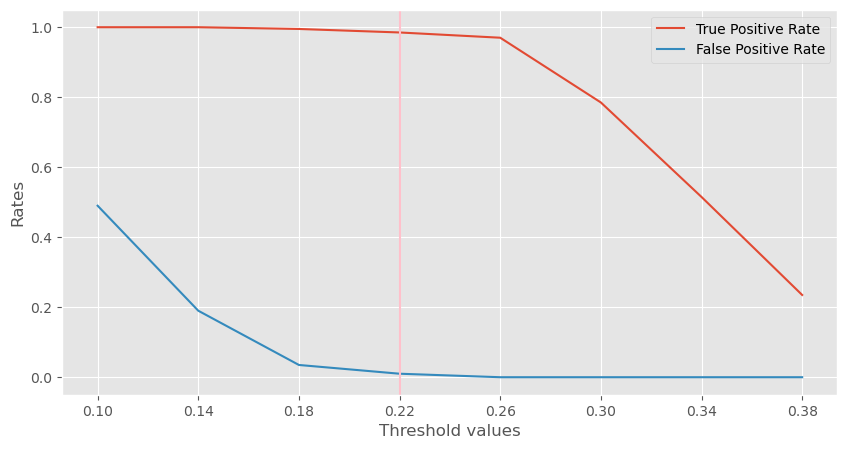

In [16]:
plt.plot(thresholds, median3x3_d_5_95_true_positive_rates, label='True Positive Rate')
plt.plot(thresholds, median3x3_d_5_95_false_positive_rates, label='False Positive Rate')
plt.xticks(thresholds)

plt.axvline(x=parameters['best threshold'], c='pink')

plt.xlabel('Threshold values')
plt.ylabel('Rates').set_rotation(90)

plt.legend()

plt.show()

## Cross validation for finding the optimal value of d and tau

In [ ]:
tau_values = list(range(90, 110, 2))
d_values = list(range(4,10))
for tau in tau_values:
    for d in d_values:
        # Reading median feature values from text file
        median3x3_d_tau_feature_values = []
        with open(f'./Data/d_and_tau3x3/median3x3/d-{d}-tau-{tau}.txt', 'r') as out:
            f = out.readline().strip()
            while f:
                f = out.readline().strip()                
                if f != '':
                    median3x3_d_tau_feature_values.append(float(f))

        # Reading median feature values from text file
        original_d_tau_feature_values = []
        with open(f'./Data/d_and_tau3x3/original/d-{d}-tau-{tau}.txt', 'r') as out:
            f = out.readline().strip()
            while f:
                f = out.readline().strip()                
                if f != '':
                    original_d_tau_feature_values.append(float(f))    

        # Computing true positive and false positive values for range of threshold values
        median3x3_d_tau_true_positive_rates = []
        median3x3_d_tau_false_positive_rates = []

        thresholds = np.arange(0.1, 0.4, 0.04)
        for threshold in thresholds:
            rates = TPFP_calculator(median3x3_d_tau_feature_values, original_d_tau_feature_values, threshold)
            median3x3_d_tau_true_positive_rates.append(rates[0])
            median3x3_d_tau_false_positive_rates.append(rates[1])

        # Computing the best threshold value for given d and tau
        print({**{'d': d, 'tau': tau} , **best_threshold(median3x3_d_5_95_true_positive_rates, 
                median3x3_d_5_95_false_positive_rates,
                thresholds)})

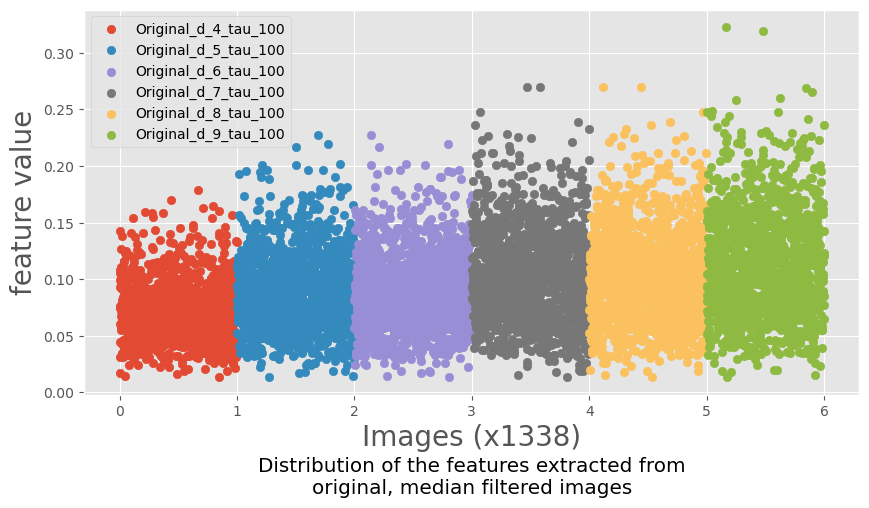

In [5]:
# Loading features
original_d_tau_feature_values_list = []

tau_values = [100] # list(range(90, 110, 2))
d_values = list(range(4,10))

for tau in tau_values:
    for d in d_values:
        original_d_tau_feature_values = []
        with open(f'./Data/d_and_tau3x3/original/d-{d}-tau-{tau}.txt', 'r') as out:
            f = out.readline().strip()
            while f:
                original_d_tau_feature_values.append(float(f))
                f = out.readline().strip()

        original_d_tau_feature_values_list.append(original_d_tau_feature_values)

# Plotting features
plt.rcParams['figure.figsize'] = [10, 5]  # this changes default fig size

for i in range(len(tau_values)):
    for j in range(len(d_values)):
        plt.scatter(np.arange(j, j+1, 1/1338), original_d_tau_feature_values_list[j], label= f'Original_d_{d_values[j]}_tau_{tau_values[i]}')

plt.xticks(np.arange(0, len(d_values)+1, 1.0))
plt.xlabel("Images (x1338)", fontsize=20)
plt.ylabel("feature value", fontsize=20).set_rotation(90)
plt.title('Distribution of the features extracted from\noriginal, median filtered images', y=-0.28)
plt.legend()
# plt.savefig('FIG-1')
plt.show()

## Trying a range of tau values

In [5]:
tau_values = list(range(50, 150, 10))
d_values = [7]

if not os.path.exists('./Data/d_and_tau3x3_hyperparameter_tuning/original'):
    os.makedirs('./Data/d_and_tau3x3_hyperparameter_tuning/original')
    os.makedirs('./Data/d_and_tau3x3_hyperparameter_tuning/median3x3')

for tau in tau_values:
    for d in d_values:
        print(f'Running code for tau = {tau} and d value = {d}')
        ucid_images = os.listdir(dataset_path)
        np.random.shuffle(ucid_images)
        ucid_images = ucid_images[:200]

        # Extracting the feature value from original images
        original_filename = f'./Data/d_and_tau3x3_hyperparameter_tuning/original/d-{d}-tau-{tau}.txt' 
        if os.path.exists(original_filename):
            break
        with open(original_filename, 'w') as out:
            for img in ucid_images:
                img_path = os.path.join(dataset_path, img)
                I = cv2.imread(img_path, 0)
                out.write(str(caoICME10(I, d, tau)) + '\n')

        # Extracting the feature value from median filtered images
        median3x3_filename = f'./Data/d_and_tau3x3_hyperparameter_tuning/median3x3/d-{d}-tau-{tau}.txt' 
        if os.path.exists(median3x3_filename):
            break
        with open(median3x3_filename, 'w') as out:
            for img in ucid_images:
                img_path = os.path.join(dataset_path, img)
                I = cv2.imread(img_path, 0)
                # Applying 3x3 median filter
                blurred_I = cv2.medianBlur(I, 3)
                out.write(str(caoICME10(blurred_I, d, tau)) + '\n')

Running code for tau = 50 and d value = 7
Running code for tau = 60 and d value = 7
Running code for tau = 70 and d value = 7
Running code for tau = 80 and d value = 7
Running code for tau = 90 and d value = 7
Running code for tau = 100 and d value = 7
Running code for tau = 110 and d value = 7
Running code for tau = 120 and d value = 7
Running code for tau = 130 and d value = 7
Running code for tau = 140 and d value = 7


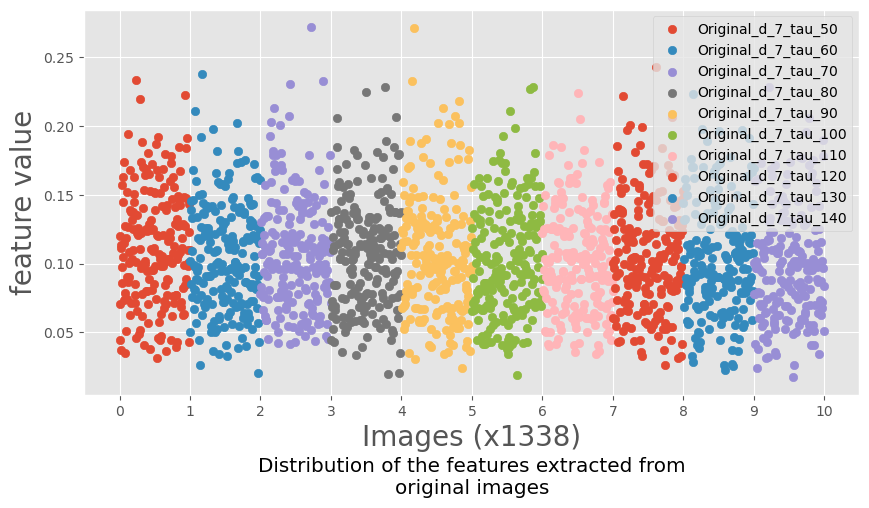

In [3]:
# Loading features
original_d_tau_feature_values_list = []

tau_values = list(range(50, 150, 10))
d_values = [7]

for tau in tau_values:
    for d in d_values:
        original_d_tau_feature_values = []
        with open(f'./Data/d_and_tau3x3_hyperparameter_tuning/original/d-{d}-tau-{tau}.txt', 'r') as out:
            f = out.readline().strip()
            while f:
                original_d_tau_feature_values.append(float(f))
                f = out.readline().strip()

        original_d_tau_feature_values_list.append(original_d_tau_feature_values)


# Plotting features
plt.rcParams['figure.figsize'] = [10, 5]  # this changes default fig size

for i in range(len(tau_values)):
    for j in range(len(d_values)):
        plt.scatter(np.arange(i, i+1, 1/200), original_d_tau_feature_values_list[i], label= f'Original_d_{d_values[j]}_tau_{tau_values[i]}')

plt.xticks(np.arange(0, len(tau_values)+1, 1.0))
plt.xlabel("Images (x1338)", fontsize=20)
plt.ylabel("feature value", fontsize=20).set_rotation(90)
plt.title('Distribution of the features extracted from\noriginal images', y=-0.28)
plt.legend()
# plt.savefig('FIG-1')
plt.show()